# [Java基础之—反射](https://blog.csdn.net/sinat_38259539/article/details/71799078)

**反射是框架设计的灵魂**  
**使用的前提条件：必须先得到代表的字节码的Class，Class类用于表示.class文件（字节码）**

## 反射的概述
JAVA反射机制是在运行状态中，对于任意一个类，都能够知道这个类的所有属性和方法；对于任意一个对象，都能够调用它的任意一个方法和属性；这种动态获取的信息以及动态调用对象的方法的功能称为java语言的反射机制。  

要想解剖一个，必须先要获取到该类的字节码文件对象。而解剖使用的就是Class类中的方法，所以先要获取到每一个字节码文件对应的Class类型的对象。

以上的总结就是什么是反射  
**反射就是把java类中的各种成分映射成一个个的Java对象**

例如：一个类有：成员变量、方法、构造方法、包等等信息，利用反射技术可以对一个类进行解剖，把个个组成部分映射成一个个对象。

其实：一个类中这些成员方法、构造方法、在加入类中都有一个类来描述

如图是类的正常加载过程：反射的原理在与class对象。  
加载的时候：**Class对象的由来是将class文件读入内存，并为之创建一个Class对象。**

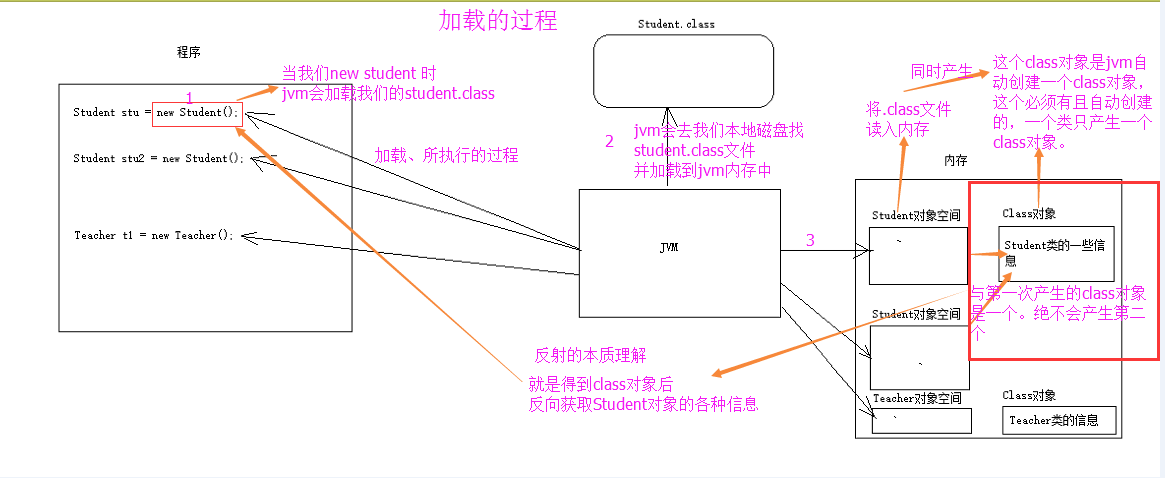

## 反射的概念
主要是指程序可以访问，检测和修改它本身状态或行为的一种能力，并能根据自身行为的状态和结果，调整或修改应用所描述行为的状态和相关的语义。

反射是java中一种强大的工具，能够使我们很方便的创建灵活的代码，这些代码可以再运行时装配，无需在组件之间进行源代码链接。但是反射使用不当会成本很高！

### 反射机制中的类
- java.lang.Class;                
- java.lang.reflect.Constructor; 
- java.lang.reflect.Field;        
- java.lang.reflect.Method;
- java.lang.reflect.Modifier;

## 具体功能实现

### 获取类：反射机制获取类有三种方法

```java
//第一种方式：Class.forName("全类名")
Class<?> c1 = Class.forName("Employee");

//第二种方式：类名.class
//java中每个类型都有class 属性
Class<?> c2 = Employee.class;
 
//第三种方式：对象.getClass()
//java语言中任何一个java对象都有getClass 方法
Employee e = new Employee();
Class<?> c3 = e.getClass(); //c3是运行时类 (e的运行时类是Employee)
```

### 创建对象：获取类以后我们来创建它的对象

```
Class c = Class.forName("Employee");
//创建此Class 对象所表示的类的一个新实例
Object o = c.newInstance(); //调用了Employee的无参数构造方法
```

### 获取属性：分为所有的属性和指定的属性
#### 获取所有的属性的

In [37]:
import java.lang.reflect.Field;
import java.lang.reflect.Modifier;

//获取整个类
Class c = Class.forName("java.lang.Class");
//获取所有的属性
Field[] fs = c.getDeclaredFields();
//输出所有属性
for(Field field:fs)
    System.out.println(field);
System.out.println();


//定义可变长的字符串，用来存储属性
StringBuffer sb = new StringBuffer();
//通过追加的方法，将每个属性拼接到此字符串中
//最外边的public定义
sb.append(Modifier.toString(c.getModifiers()) + " class " + c.getSimpleName() +"{\n");
//里边的每一个属性
for(Field field:fs){
    sb.append("\t");//空格
    sb.append(Modifier.toString(field.getModifiers())+" ");//获得属性的修饰符，例如public，static等等
    sb.append(field.getType().getSimpleName() + " ");//属性的类型的名字
    sb.append(field.getName()+";\n");//属性的名字+回车
}

sb.append("}");

System.out.println(sb);

private static final int java.lang.Class.ANNOTATION
private static final int java.lang.Class.ENUM
private static final int java.lang.Class.SYNTHETIC
private transient volatile java.lang.reflect.Constructor java.lang.Class.cachedConstructor
private transient volatile java.lang.Class java.lang.Class.newInstanceCallerCache
private transient java.lang.String java.lang.Class.name
private transient java.lang.Module java.lang.Class.module
private transient java.lang.String java.lang.Class.packageName
private final java.lang.Class java.lang.Class.componentType
private static java.security.ProtectionDomain java.lang.Class.allPermDomain
private transient volatile java.lang.ref.SoftReference java.lang.Class.reflectionData
private transient volatile int java.lang.Class.classRedefinedCount
private transient volatile sun.reflect.generics.repository.ClassRepository java.lang.Class.genericInfo
private static final java.lang.Class[] java.lang.Class.EMPTY_CLASS_ARRAY
private static final long java.lang.

#### 获取特定的属性，对比着传统的方法来学习

In [47]:
//import java.lang.Class;

//以前的方式：
/*
User u = new User();
u.age = 12; //set
System.out.println(u.age); //get
*/

//获取类
Class c = Class.forName("java.lang.Class");
//获取id属性
Field idF = c.getDeclaredField("ANNOTATION");
System.out.println(idF);

//实例化这个类赋给o
//Object o = c.newInstance();//需要Class类有构造函数
//打破封装
idF.setAccessible(true); //使用反射机制可以打破封装性，导致了java对象的属性不安全。
//给o对象的id属性赋值"110"
//idF.set(o, "110"); //set
//get
//System.out.println(idF.get(o));

private static final int java.lang.Class.ANNOTATION


### 获取方法，和构造方法：关键字

|方法关键字| 含义|
|:---------|:----|
|getDeclaredMethods()|获取所有的方法|
|getReturnType()|获得方法的放回类型|
|getParameterTypes()|获得方法的传入参数类型|
|getDeclaredMethod("方法名",参数类型.class,……)|获得特定的方法|
| | |
|**构造方法关键字**|**含义**|
|getDeclaredConstructors()|获取所有的构造方法|
|getDeclaredConstructor(参数类型.class,……)|获取特定的构造方法|
| | |
|**父类和父接口**|**含义**|
|getSuperclass()|获取某类的父类|
|getInterfaces()|获取某类实现的接口|

这样我们就可以获得类的各种内容，进行了反编译。对于JAVA这种先编译再运行的语言来说，反射机制可以使代码更加灵活，更加容易实现面向对象。

## 反射加配置文件，使我们的程序更加灵活
配置文件为.properties,称作属性文件。通过反射读取里边的内容。代码是固定的，但是利用配置文件的内容我们可以改，这样使我们的代码灵活了很多！